In [59]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay



In [60]:
data = pd.read_csv('HIGGS_8K.csv', header  = None)

In [61]:
print(data.dtypes)

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17     object
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
dtype: object


In [62]:
data.iloc[:,17]

0       0.000000000000000000e+00.1
1                              0.0
2                2.548224449157715
3                              0.0
4                              0.0
                   ...            
7996             2.548224449157715
7997             2.548224449157715
7998             2.548224449157715
7999                           0.0
8000             2.548224449157715
Name: 17, Length: 8001, dtype: object

In [63]:
data[17] = data[17].replace('0.000000000000000000e+00.1', '0.0')

In [64]:
data[17] = pd.to_numeric(data[17], errors='coerce')

In [65]:
X = data.drop(data.columns[0], axis=1)
Y = data.iloc[:, 0]

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=4455)

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
X_train_low = X_train_scaled[:, 0:21] 
X_test_low = X_test_scaled[:, 0:21]

In [69]:
X_train_high = X_train_scaled[:, 21:28]  
X_test_high = X_test_scaled[:, 21:28]

# K Nearest Neighbour

In [70]:
#low level quantities
knn_classifier_low = KNeighborsClassifier(n_neighbors = 15)
knn_classifier_low.fit(X_train_low, Y_train)
knn_pred_low = knn_classifier_low.predict(X_test_low)

In [71]:
#high level quantities
knn_classifier_high = KNeighborsClassifier(n_neighbors = 20)
knn_classifier_high.fit(X_train_high, Y_train)
knn_pred_high = knn_classifier_high.predict(X_test_high)

In [72]:
#testing low level
knn_cm_low = confusion_matrix(Y_test, knn_pred_low)
print(knn_cm_low)
accuracy_score(Y_test, knn_pred_low)

[[492 703]
 [346 860]]


0.5630987088713036

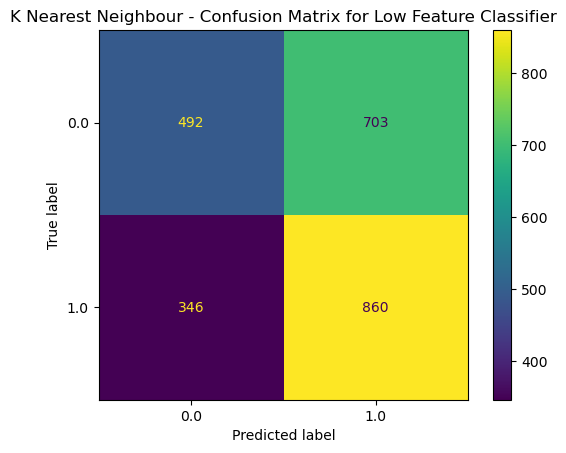

In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm_low, display_labels=knn_classifier_low.classes_)
disp.plot()
plt.title("K Nearest Neighbour - Confusion Matrix for Low Feature Classifier")
plt.show()

In [74]:
#testing high level
knn_cm_high = confusion_matrix(Y_test, knn_pred_high)
print(knn_cm_high)
accuracy_score(Y_test, knn_pred_high)

[[776 419]
 [364 842]]


0.6738858808829654

In [102]:
print("precision", (860 ) / (703 + 860))
print("recall", (860) / (346+ 860))


precision 0.5502239283429302
recall 0.7131011608623549


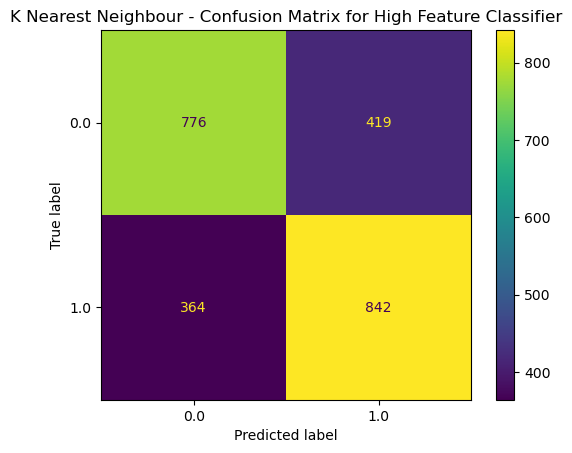

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=knn_cm_high, display_labels=knn_classifier_high.classes_)
disp.plot()
plt.title("K Nearest Neighbour - Confusion Matrix for High Feature Classifier")
plt.show()

In [108]:
print("precision", (842 ) / (842 + 419))
print("recall", (842) / (842+ 364))


precision 0.6677240285487708
recall 0.6981757877280266


# Random Forest

In [76]:
rf_classifier_low = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
rf_classifier_low.fit(X_train_low, Y_train)
rf_pred_low = rf_classifier_low.predict(X_test_low)

In [77]:
rf_classifier_high = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
rf_classifier_high.fit(X_train_high, Y_train)
rf_pred_high = rf_classifier_high.predict(X_test_high)

In [78]:
#testing low level
rf_cm_low = confusion_matrix(Y_test, rf_pred_low)
print(rf_cm_low)
accuracy_score(Y_test, rf_pred_low)

[[627 568]
 [390 816]]


0.6009995835068721

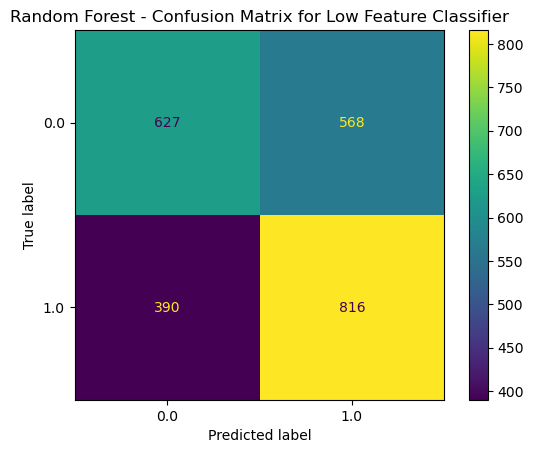

In [79]:
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm_low, display_labels=rf_classifier_low.classes_)
disp.plot()
plt.title("Random Forest - Confusion Matrix for Low Feature Classifier")
plt.show()

In [107]:
print("precision", (816 ) / (816 + 568))
print("recall", (816) / (816+ 390))


precision 0.5895953757225434
recall 0.6766169154228856


In [80]:
#testing high level
rf_cm_high = confusion_matrix(Y_test, rf_pred_high)
print(rf_cm_high)
accuracy_score(Y_test, rf_pred_high)

[[798 397]
 [370 836]]


0.6805497709287797

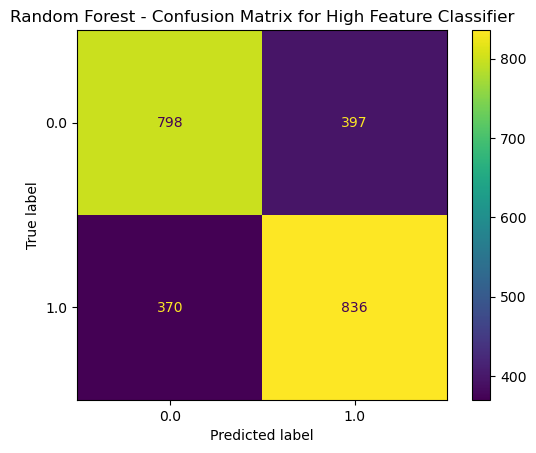

In [81]:
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm_high, display_labels=rf_classifier_high.classes_)
disp.plot()
plt.title("Random Forest - Confusion Matrix for High Feature Classifier")
plt.show()

In [106]:
print("precision", (836 ) / (836 + 397))
print("recall", (836) / (836+ 370))


precision 0.6780210867802109
recall 0.693200663349917


# Neural Network

In [82]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [83]:
ann_low = tf.keras.models.Sequential()

In [84]:
ann_low.add(Input(shape=(21)))  # This is the Input layer
ann_low.add(tf.keras.layers.Dense(24, activation='relu')) # Hidden layer
ann_low.add(tf.keras.layers.Dense(12, activation='relu'))
ann_low.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [85]:
#for non-binary classification loss ='categorical_crossentropy'
ann_low.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [86]:
ann_low.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 24)                528       
                                                                 
 dense_7 (Dense)             (None, 12)                300       
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 841
Trainable params: 841
Non-trainable params: 0
_________________________________________________________________


In [87]:
ann_low.fit(X_train_low, Y_train, batch_size = 32, epochs = 50)

Epoch 1/50
175/175 [==============================] - 0s 812us/step - loss: 0.6968 - accuracy: 0.5368
Epoch 2/50
175/175 [==============================] - 0s 808us/step - loss: 0.6787 - accuracy: 0.5652
Epoch 3/50
175/175 [==============================] - 0s 898us/step - loss: 0.6703 - accuracy: 0.5823
Epoch 4/50
175/175 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.5932
Epoch 5/50
175/175 [==============================] - 0s 996us/step - loss: 0.6581 - accuracy: 0.6073
Epoch 6/50
175/175 [==============================] - 0s 1ms/step - loss: 0.6533 - accuracy: 0.6112
Epoch 7/50
175/175 [==============================] - 0s 896us/step - loss: 0.6477 - accuracy: 0.6196
Epoch 8/50
175/175 [==============================] - 0s 1ms/step - loss: 0.6424 - accuracy: 0.6270
Epoch 9/50
175/175 [==============================] - 0s 952us/step - loss: 0.6376 - accuracy: 0.6388
Epoch 10/50
175/175 [==============================] - 0s 1ms/step - loss: 0.6346 - accu

In [88]:
ann_pred_low = ann_low.predict(X_test_low)
ann_pred_low = ann_pred_low > 0.5

76/76 [==============================] - 0s 1ms/step


In [89]:
ann_cm_low = confusion_matrix(Y_test, ann_pred_low)
print(ann_cm_low)
accuracy_score(Y_test, ann_pred_low)

[[692 503]
 [493 713]]


0.5851728446480633

In [90]:
#high Feature
ann_high = tf.keras.models.Sequential()
ann_high.add(Input(shape=(7)))  # This is the Input layer
ann_high.add(tf.keras.layers.Dense(24, activation='relu')) # Hidden layer
ann_high.add(tf.keras.layers.Dense(12, activation='relu'))
ann_high.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [91]:
#for non-binary classification loss ='categorical_crossentropy'
ann_high.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [92]:
ann_high.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 24)                192       
                                                                 
 dense_10 (Dense)            (None, 12)                300       
                                                                 
 dense_11 (Dense)            (None, 1)                 13        
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [93]:
ann_high.fit(X_train_high, Y_train, batch_size = 32, epochs = 50)

Epoch 1/50
175/175 [==============================] - 1s 1ms/step - loss: 0.6916 - accuracy: 0.5543
Epoch 2/50
175/175 [==============================] - 0s 1ms/step - loss: 0.6671 - accuracy: 0.6148
Epoch 3/50
175/175 [==============================] - 0s 937us/step - loss: 0.6462 - accuracy: 0.6286
Epoch 4/50
175/175 [==============================] - 0s 916us/step - loss: 0.6322 - accuracy: 0.6461
Epoch 5/50
175/175 [==============================] - 0s 998us/step - loss: 0.6207 - accuracy: 0.6570
Epoch 6/50
175/175 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.6636
Epoch 7/50
175/175 [==============================] - 0s 921us/step - loss: 0.6038 - accuracy: 0.6743
Epoch 8/50
175/175 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.6752
Epoch 9/50
175/175 [==============================] - 0s 975us/step - loss: 0.5950 - accuracy: 0.6784
Epoch 10/50
175/175 [==============================] - 0s 1ms/step - loss: 0.5910 - accura

In [94]:
ann_pred_high = ann_high.predict(X_test_high)
ann_pred_high = ann_pred_high > 0.5

76/76 [==============================] - 0s 777us/step


In [95]:
ann_cm_high = confusion_matrix(Y_test, ann_pred_high)
print(ann_cm_high)
accuracy_score(Y_test, ann_pred_high)

[[813 382]
 [336 870]]


0.7009579341940858

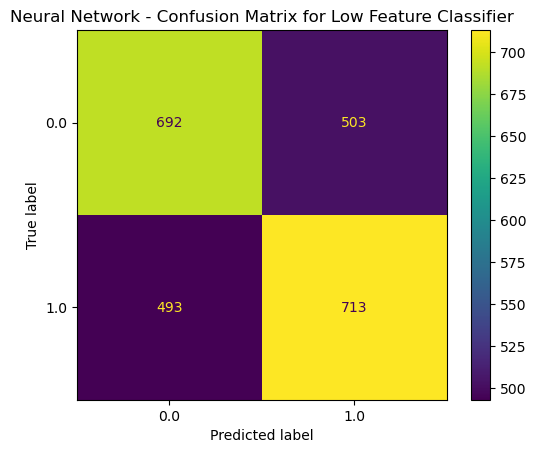

In [96]:
disp = ConfusionMatrixDisplay(confusion_matrix=ann_cm_low, display_labels=rf_classifier_high.classes_)
disp.plot()
plt.title("Neural Network - Confusion Matrix for Low Feature Classifier")
plt.show()

In [109]:
print("precision", (713 ) / (713 + 503))
print("recall", (713) / (713 + 493))

precision 0.5863486842105263
recall 0.5912106135986733


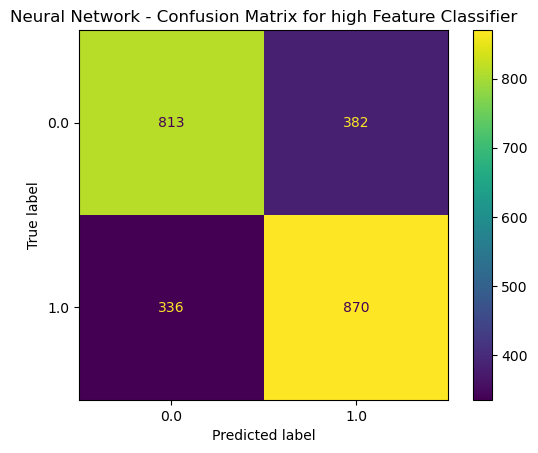

In [97]:
disp = ConfusionMatrixDisplay(confusion_matrix=ann_cm_high, display_labels=rf_classifier_high.classes_)
disp.plot()
plt.title("Neural Network - Confusion Matrix for high Feature Classifier")
plt.show()

In [110]:
print("precision", (870 ) / (870 + 382))
print("recall", (870) / (870 + 336))

precision 0.694888178913738
recall 0.7213930348258707
